In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
bank = pd.read_csv('bank-full.csv')

In [3]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [5]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
bank.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
Target       False
dtype: bool

In [8]:
bank.shape

(45211, 17)

In [9]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

Bank client data Analysis

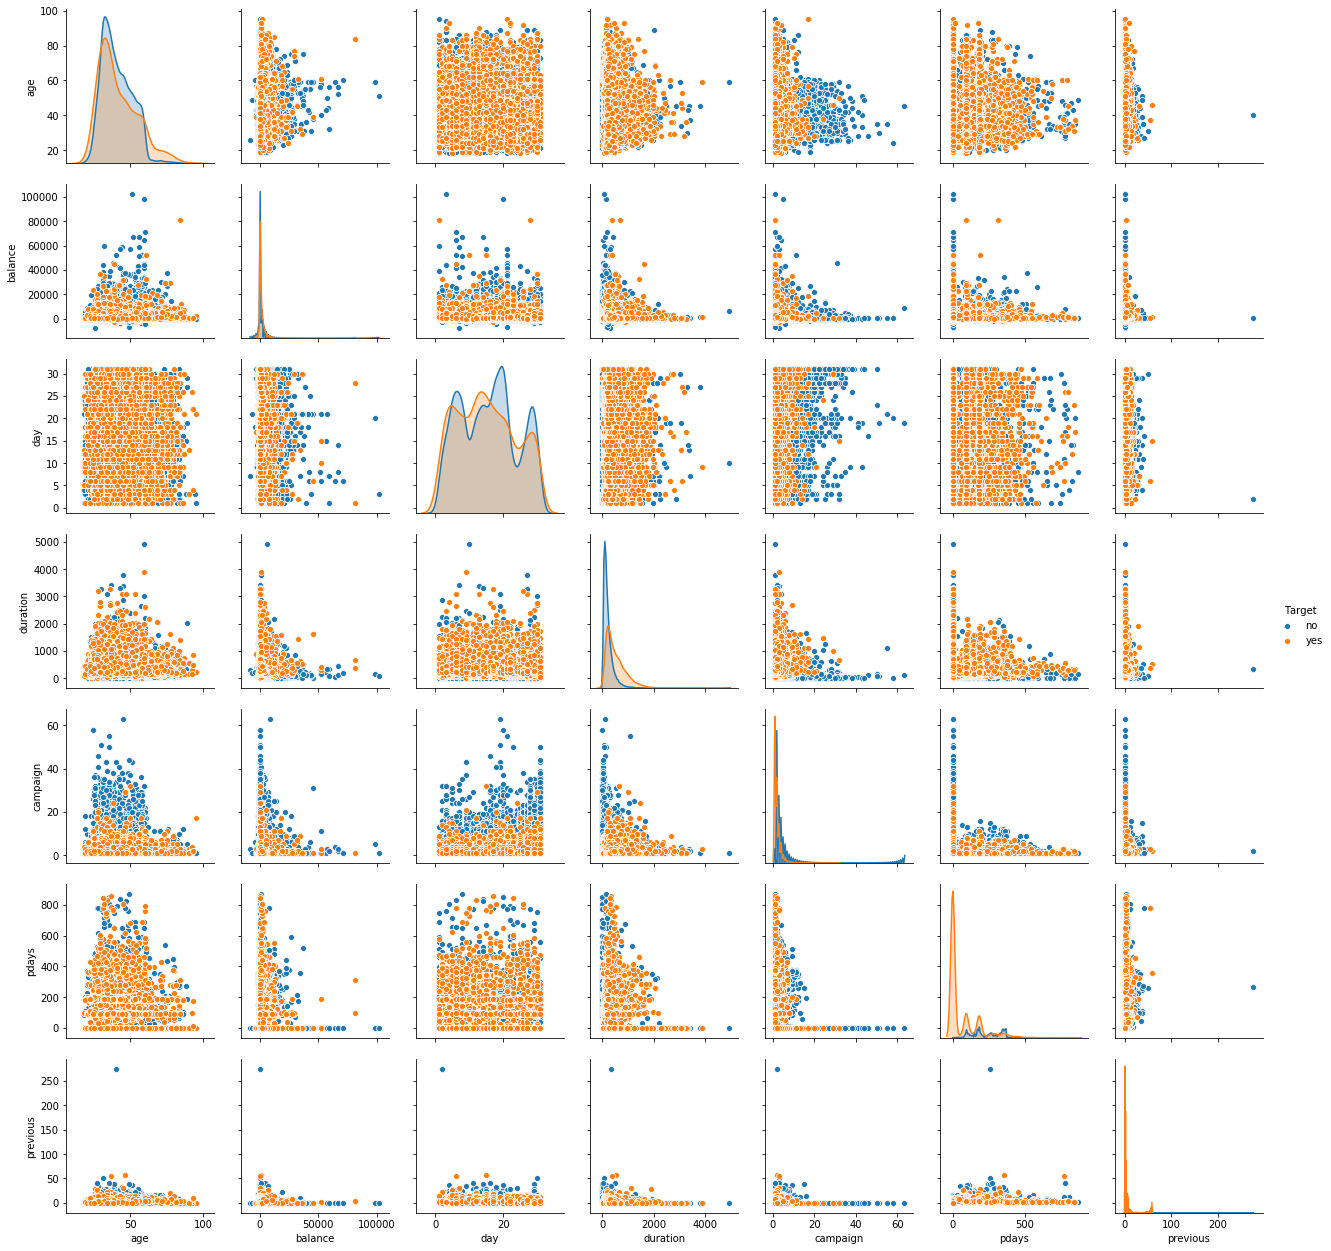

In [10]:
sns.pairplot(bank, hue='Target')

In [11]:
bank['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

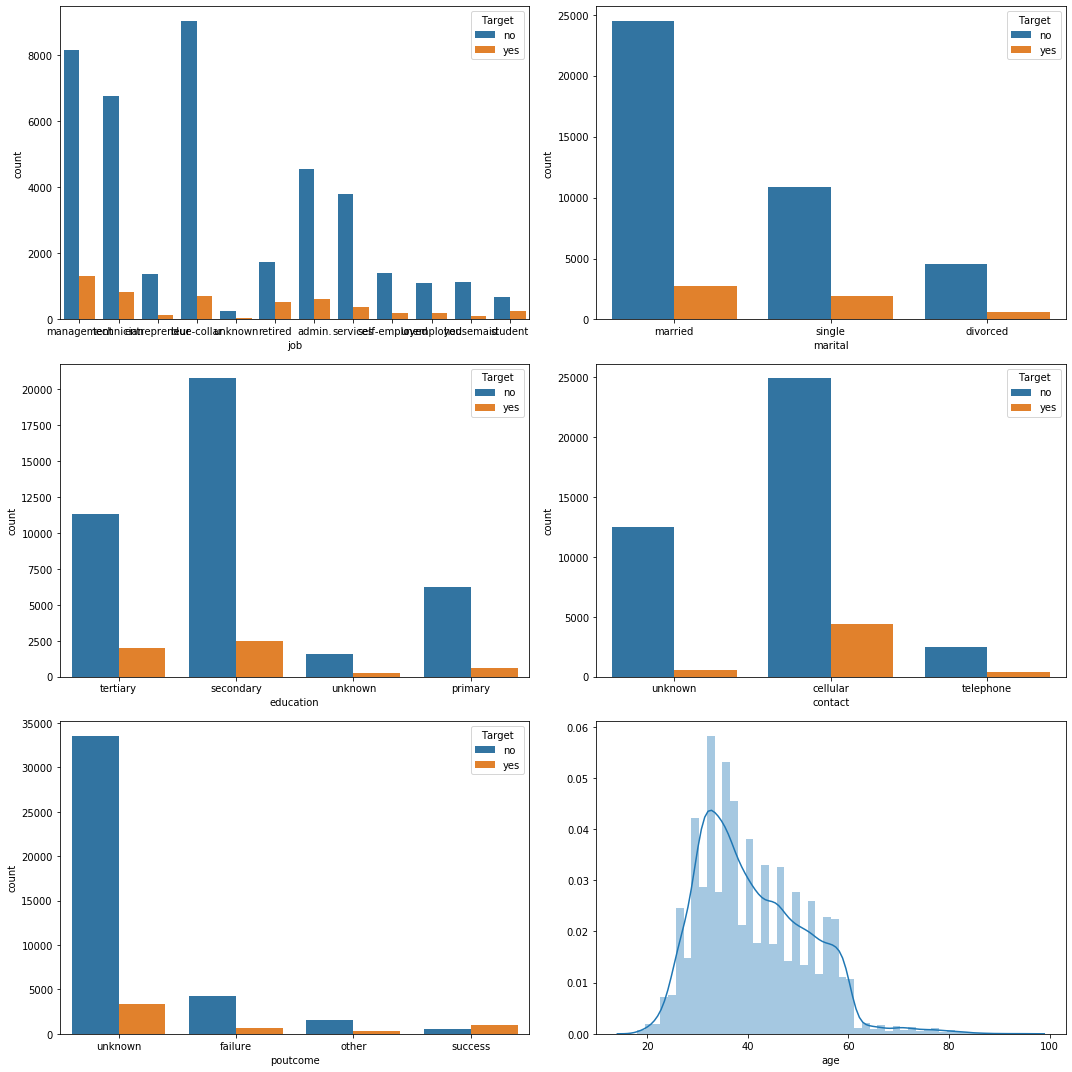

In [12]:
fig, axes=plt.subplots(nrows=3, ncols=2, figsize=(15,15))
sns.countplot(bank['job'], hue=bank['Target'], ax=axes[0][0])
sns.countplot(bank['marital'], hue=bank['Target'], ax=axes[0][1])
sns.countplot(bank['education'], hue=bank['Target'], ax=axes[1][0])
sns.countplot(bank['contact'], hue=bank['Target'], ax=axes[1][1])
sns.countplot(bank['poutcome'], hue=bank['Target'], ax=axes[2][0])
sns.distplot(bank['age'], ax=axes[2][1])
plt.tight_layout()

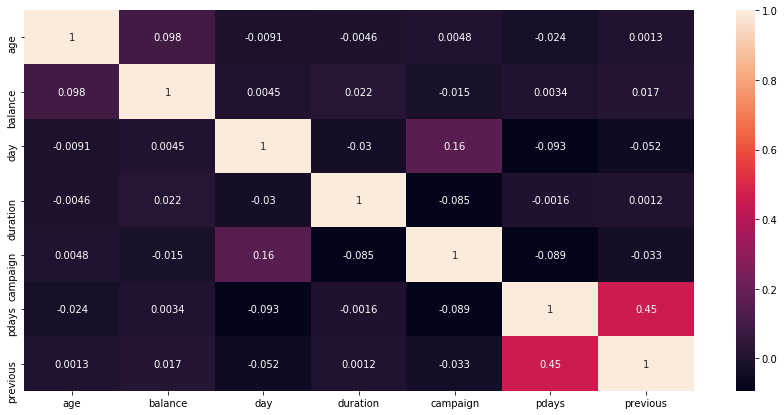

In [13]:
corr1=bank.corr()
plt.figure(figsize=(15,7))
sns.heatmap(corr1, annot=True)

In [14]:
print("Categorical and Non-Categorical Columns")
cat_col=[]
non_cat_col=[]
for col in bank.columns:
    if bank[col].dtype.name == 'object':
        cat_col.append(col)
    else:
        non_cat_col.append(col)
print("\nColumns with categorical data:\n", cat_col)
print("\nColumns with non-categorical data:\n", non_cat_col)
        
    

Categorical and Non-Categorical Columns

Columns with categorical data:
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'Target']

Columns with non-categorical data:
 ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


In [15]:
bank.describe(include='object').T

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
Target,45211,2,no,39922


In [16]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


# 1.1 Age Analysis

# Calculating outliers for Age

In [17]:
iqr_age= bank['age'].quantile(q=0.75)-bank['age'].quantile(q=0.25)
print("Upper Limit:", bank['age'].quantile(q=0.75)+ 1.5* iqr_age)
print("Lower Limit:", bank['age'].quantile(q=0.25)- 1.5* iqr_age)

Outliers= bank[bank['age']>70.5].Target.value_counts()
Outliers

Upper Limit: 70.5
Lower Limit: 10.5


no     269
yes    218
Name: Target, dtype: int64

AGE

Mean of Age is 41 and Standard Deviation is 11. Hence variation of Age data is low.

Median is 39 which is almost equal to Age (<) and hence there is not much skew in the Age Data.

Minimum Value is 18 and maximum value is 95.

Calculate Outliers in the Age data and visualize distribution.

Speciﬁcally, if a number is less than Q1 - 1.5×IQR or greater than Q3 + 1.5×IQR, then it is an outlier. (OUtliers lie below 
10.5 and greater than 70.5) *

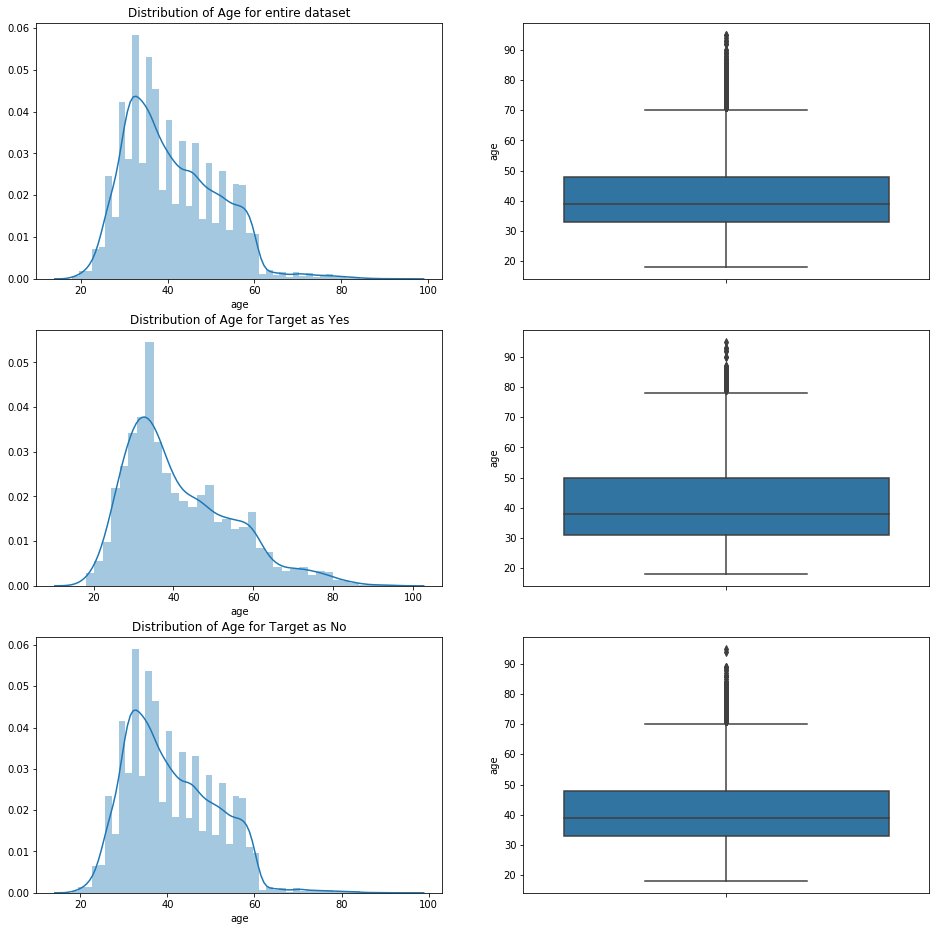

In [18]:
fig, axes =plt.subplots(3,2,figsize=(16,16))
axes[0][0].set_title('Distribution of Age for entire dataset')
sns.distplot(bank['age'], ax=axes[0][0])
sns.boxplot(bank['age'], hue= bank['Target'], ax= axes[0][1], orient = "v")
axes[1][0].set_title('Distribution of Age for Target as Yes')
sns.distplot(bank['age'][bank['Target']=='yes'] , ax=axes[1][0])
sns.boxplot(bank['age'][bank['Target']=='yes'], hue= bank['Target'], ax= axes[1][1], orient = "v")
axes[2][0].set_title('Distribution of Age for Target as No')
sns.distplot(bank['age'][bank['Target']=='no'], ax=axes[2][0])
sns.boxplot(bank['age'][bank['Target']=='no'], hue= bank['Target'], ax= axes[2][1], orient = "v")

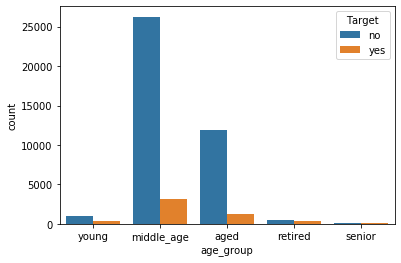

In [19]:
bank['age_group']= pd.cut(bank['age'], [18,25,45,60,75,100], labels=['young','middle_age','aged','retired','senior'])
sns.countplot(bank['age_group'], hue=bank['Target'])

In [20]:
bank[(bank['age']>60) & (bank['age']<70.5)].Target.value_counts()

no     417
yes    284
Name: Target, dtype: int64

In [21]:
bank[(bank['age']>70.5)].Target.value_counts()

no     269
yes    218
Name: Target, dtype: int64

AGE:

Outliers Start from 70.5 (as per IQR calculation and as seen in the box plot)

Age distribution shows majority of the population lies in the age range of 20-60.

One interesting fact is that there are quite a number of population aged over 60 who have subscribed to the term deposit.

582 people have opted for Term deposit having age over 60. If we consider a typical retirement age as 60, post retirement, people might have an inclination towards having term deposit

Middle Age and Aged have the majority distribution among those who have selected for term Deposit. Some retired persons have selected for Term deposit.

Age Distribution for people not selected term deposit is almost similar to the Age Distribution of the entire data.

# 1.2 Job Analysis

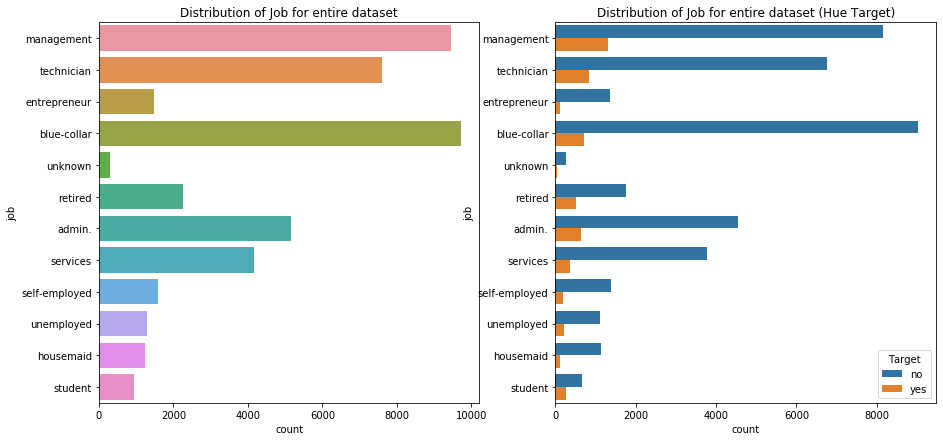

In [22]:
fig1, axes1 =plt.subplots(nrows=1, ncols=2, figsize=(15,7))
axes1[0].set_title('Distribution of Job for entire dataset')
sns.countplot(y=bank['job'], ax=axes1[0])
axes1[1].set_title('Distribution of Job for entire dataset (Hue Target)')
sns.countplot(y=bank['job'],hue=bank['Target'], ax=axes1[1])

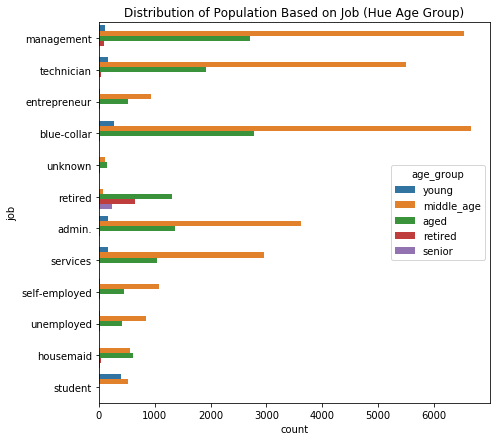

In [23]:
plt.figure(figsize=(7,7))
plt.title('Distribution of Population Based on Job (Hue Age Group)')
sns.countplot(y=bank['job'],hue=bank['age_group'])

JOB

The highest number within the population has a Blue collar Job, management, technician and admin.

Majority of the population who opted for term deposit, fall in the management job category, followed by Technician.

Total Blue Collar Job population is much higher than Admin Job category. However both have similar number of people who have opted for Term deposit. It may imply that Blue Collar jobs are not as interested in term deposit as management job groups.

Housemaid, student, unemployed have low numbers of people who opted for term deposit. Also, Enterprenuers have very low number of people who opted for term deposit. 

In [24]:
df=pd.DataFrame(data=bank, columns=['age_group', 'job','Target'])

def new_df(Age_c, Job_c, count_no, count_yes):
    newdf=pd.DataFrame({'Age': Age_c, 'Job': Job_c, 'Target_no': count_no, 'Target_yes':count_yes},index=[counter])
    return newdf

    
def cal_df(Age_c, Job_c,counter):
    count_no=0
    count_yes=0
    for val, cnt in bank[(bank['age_group']==Age_c) & (bank['job']==Job_c)].Target.value_counts().iteritems():
        #print(f'value={val}\n count={cnt}')
        if (val=='no'):
            count_no=cnt
        else:
            count_yes=cnt
    new_data= new_df(Age_c, Job_c, count_no, count_yes)
    return new_data
        
age_unique=df.age_group.unique().dropna() 
job_unique=df.job.unique() 
counter=0


In [25]:
mydf = pd.DataFrame()
for Job_c in bank.job.unique():
    for Age_c in bank[bank['job']==Job_c].age_group.unique():
        a=cal_df(Age_c, Job_c,counter)
        counter=counter+1
        mydf = pd.concat([mydf,a])


        


In [26]:
age_cat=mydf.dropna().sort_values(by='Target_yes',ascending=False)
age_cat.head()

,Age,Job,Target_no,Target_yes
1,middle_age,management,5649,898
5,middle_age,technician,4907,591
15,middle_age,blue-collar,6183,481
28,middle_age,admin.,3198,421
0,aged,management,2371,326


Job Cateogory combined with Age is assumed to be an influencing category for Target outcome.

In [27]:
job_df=pd.crosstab(index=[bank.age_group, bank.job], columns=bank.Target, margins=True)
job_df.sort_values(by=['yes'], ascending=False)

Target                       no   yes    All
age_group  job                              
All                       39917  5282  45199
middle_age management      5649   898   6547
           technician      4907   591   5498
           blue-collar     6183   481   6664
           admin.          3198   421   3619
aged       management      2371   326    109
retired    retired          371   270    641
middle_age services        2689   263   2952
aged       technician      1703   209    157
           blue-collar     2599   178    265
           admin.          1197   172    158
young      student          257   141      3
aged       retired         1172   138      2
middle_age self-employed    944   136   1080
           unemployed       720   130    850
           student          405   120    525
senior     retired          129   105    234
aged       services         959    80    161
middle_age entrepreneur     860    76    936
aged       unemployed       353    64     26
           housemaid        562    50      7
retired    management        55    43     98
young      blue-collar      224    41   2777
aged       entrepreneur     487    37     14
middle_age housemaid        529    36    565
young      technician       127    30   1912
           management        79    30   2697
           admin.           131    27   1369
           services         135    26   1039
aged       self-employed    424    26     25
retired    housemaid         26    17     43
           self-employed      6    16     22
aged       unknown          134    16      2
middle_age unknown           99    15    114
retired    admin.            14    11     25
           technician        20    10     30
           blue-collar       18     8     26
young      self-employed     17     8    450
retired    entrepreneur       6     6     12
young      unemployed        21     5    417
senior     management         3     4      7
           housemaid          9     4     13
retired    unemployed         7     3     10
young      entrepreneur      11     3    524
middle_age retired           74     3     77
young      housemaid          5     2    612
senior     unknown            2     2      4
retired    unknown           17     1     18
senior     entrepreneur       0     1      1
aged       student            2     1    398
senior     self-employed      1     1      2
young      unknown            2     0    150
retired    services           2     0      2
young      retired            2     0   1310

# 1.3 Marital Status

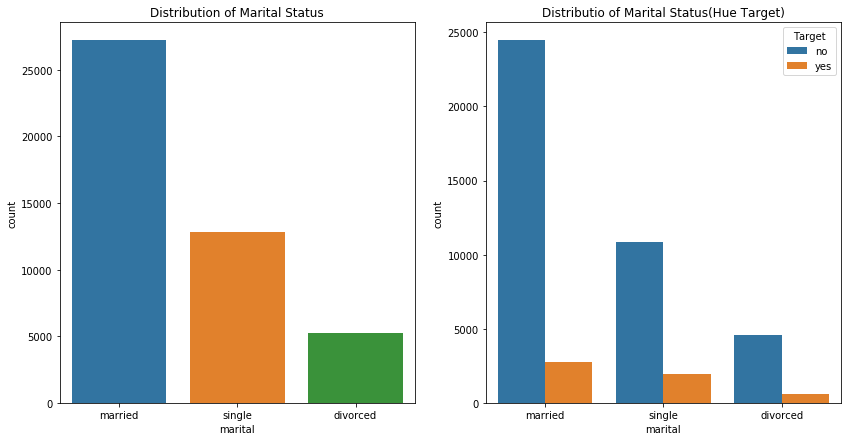

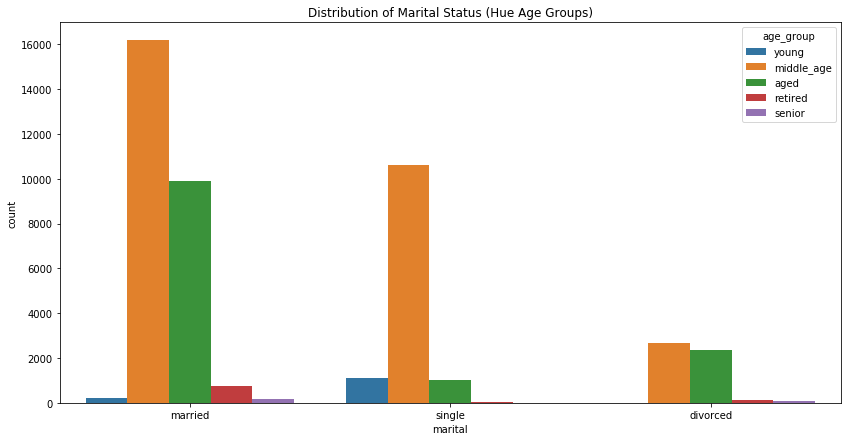

In [28]:
f1, axes2 = plt.subplots(1,2, figsize=(14,7))
axes2[0].set_title('Distribution of Marital Status')
sns.countplot(bank['marital'], ax=axes2[0])
axes2[1].set_title('Distributio of Marital Status(Hue Target)')
sns.countplot(bank['marital'], hue=bank['Target'], ax=axes2[1])
plt.figure(figsize=(14,7))
plt.title('Distribution of Marital Status (Hue Age Groups)')
sns.countplot(bank['marital'], hue=bank['age_group'])

In [29]:
def maritaldf(age_cat, marital_c, count_no, count_yes, Counter):
    df1=pd.DataFrame({'Age': age_cat, 'Marital': marital_c, 'Target_no':count_no, 'Target_yes':count_yes}, index=[Counter])
    return df1

def calc(age_cat, marital_c, Counter):
    count_no=0
    count_yes=0
    for val, cnt in bank[(bank['age_group']==age_cat) & (bank['marital']==marital_c)].Target.value_counts().iteritems():
        if (val== 'no'):
            count_no=cnt
        else:
            count_yes=cnt
    out= maritaldf(age_cat, marital_c, count_no, count_yes, Counter)
    return out
Counter=0

In [30]:
mdf=pd.DataFrame()

for marital_c in bank.marital.unique():
    for age_cat in bank[bank['marital']==marital_c].age_group.unique():
        a1=calc(age_cat, marital_c, Counter)
        Counter=Counter+1
        mdf=pd.concat([mdf,a1])


In [31]:
marital_df=mdf.dropna().sort_values(by=['Target_yes'], ascending=False)
marital_df

,Age,Marital,Target_no,Target_yes
5,middle_age,single,9104,1492
1,middle_age,married,14774,1401
0,aged,married,8959,930
3,retired,married,457,313
7,young,single,837,285
11,middle_age,divorced,2379,277
12,aged,divorced,2097,248
6,aged,single,907,119
4,senior,married,102,83
13,retired,divorced,62,65


In [32]:
#mar_df=pd.crosstab(index=[bank.age_group, bank.marital], columns=bank.Target, margins=True)
#mar_df.sort_values(by=['yes'], ascending=False)

Marital

Age group of middle age who are married or single have higher count among the data set of opting for term deposit. 

People who are married/divorced and Retired Age group have higher chances of opting for term deposit. 

Senior Age group who are married or divorced or Single have higher chances of accepting term deposit.

Young adults who are divorced are not prone to Taking term deposit.

# 1.4 Education

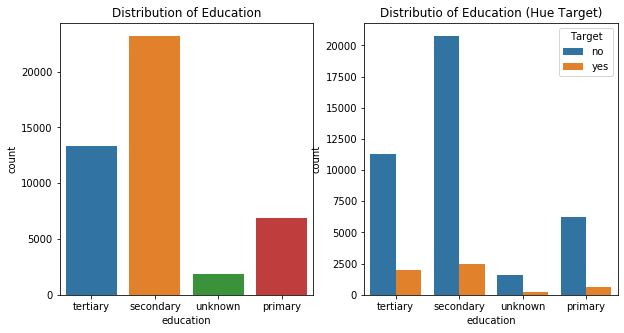

In [33]:
f2, axes3 = plt.subplots(1,2, figsize=(10,5))
axes3[0].set_title('Distribution of Education')
sns.countplot(bank['education'], ax=axes3[0])
axes3[1].set_title('Distributio of Education (Hue Target)')
sns.countplot(bank['education'], hue=bank['Target'], ax=axes3[1])
#plt.figure(figsize=(14,7))
#plt.title('Distribution of Education (Hue Age Groups)')
#sns.countplot(bank['education'], hue=bank['age_group'])

Education

Majority of the population fall into Tertiary and Secondary Edcuation category.

People with higher education seems to have more chances of taking term deposit. 

# 1.5 Default

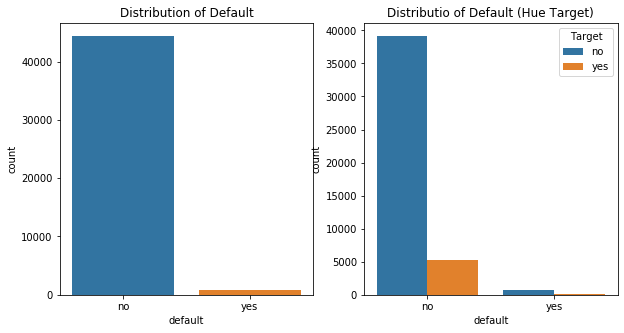

In [34]:
f3, axes4 = plt.subplots(1,2, figsize=(10,5))
axes4[0].set_title('Distribution of Default')
sns.countplot(bank['default'], ax=axes4[0])
axes4[1].set_title('Distributio of Default (Hue Target)')
sns.countplot(bank['default'], hue=bank['Target'], ax=axes4[1])

In [35]:
bank[bank['default']=='yes'].Target.value_counts()

no     763
yes     52
Name: Target, dtype: int64

Default

majority of the population donot have loan defaults.

only 52 people with loan defaults have applied for term deposits.

We will analyse loans default with Job, Education, Age and Marital Status to understand any relationship.

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

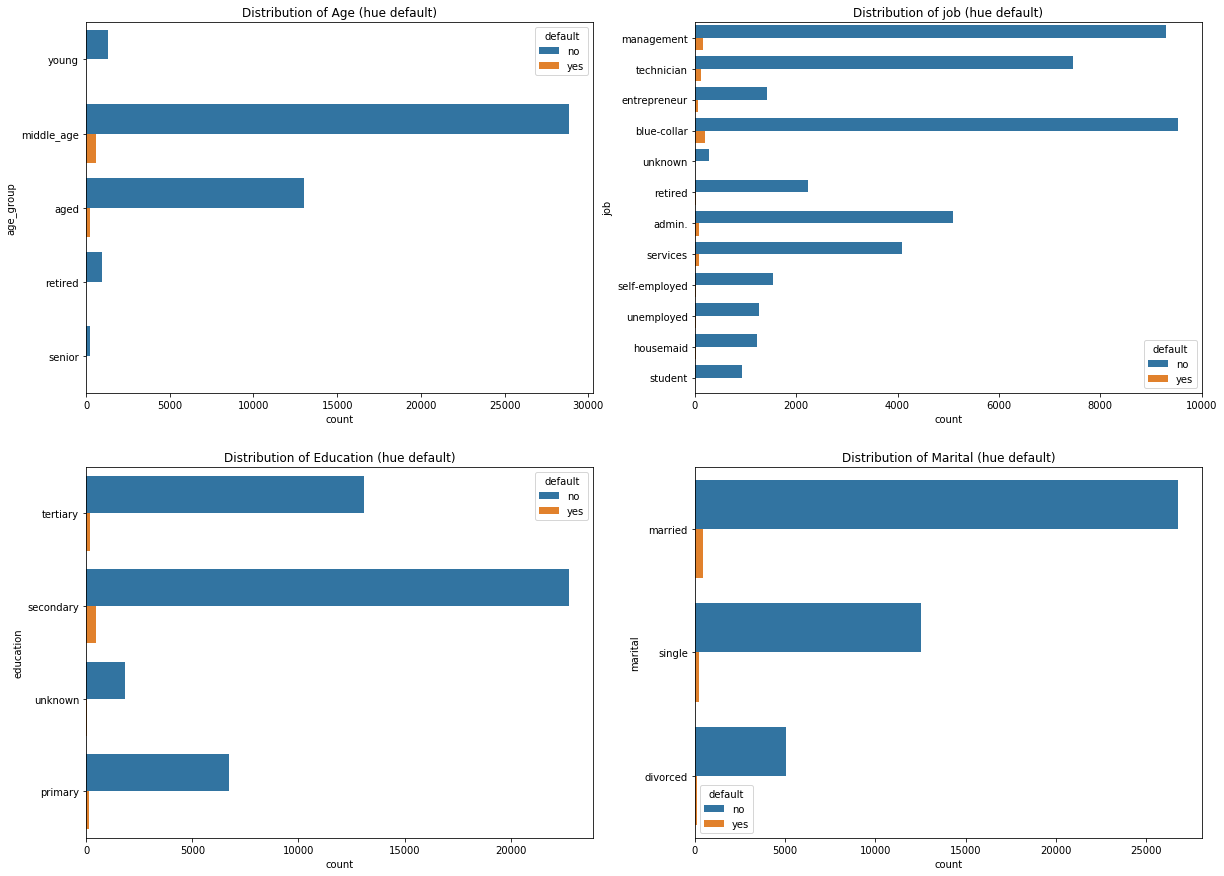

In [36]:
f4, axes5 = plt.subplots(2,2, figsize=(20,15))
axes5[0][0].set_title('Distribution of Age (hue default)')
sns.countplot(y=bank['age_group'],hue=bank['default'],ax=axes5[0][0])

axes5[0][1].set_title('Distribution of job (hue default)')
sns.countplot(y=bank['job'],hue=bank['default'],ax=axes5[0][1])

axes5[1][0].set_title('Distribution of Education (hue default)')
sns.countplot(y=bank['education'],hue=bank['default'],ax=axes5[1][0])

axes5[1][1].set_title('Distribution of Marital (hue default)')
sns.countplot(y=bank['marital'],hue=bank['default'],ax=axes5[1][1])
plt.tight_layout



There is no clear relation between the loan defaules and job. Also, are primarily distributed within middle age and Aged groups.

However, loan Defaulters are primarily distributed within middle age and Aged groups 

In [37]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,age_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,aged
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,middle_age
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,middle_age
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,aged
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,middle_age


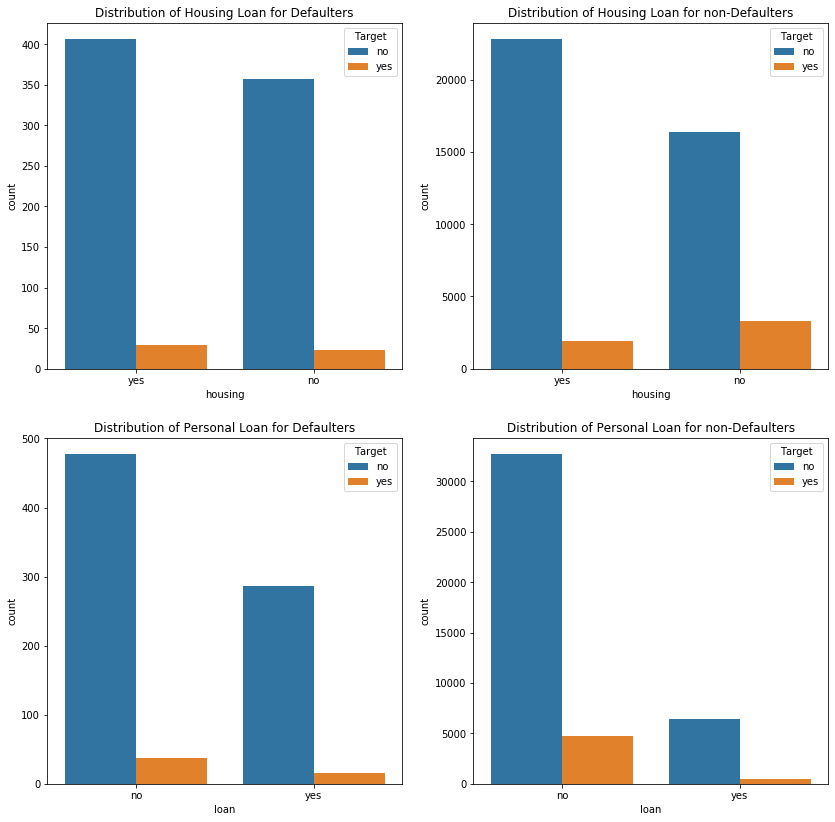

In [38]:
f5, axes6 =plt.subplots(2,2, figsize=(14,14))
axes6[0][0].set_title('Distribution of Housing Loan for Defaulters')
sns.countplot(bank['housing'][bank['default']=='yes'], hue=bank['Target'], ax=axes6[0][0])
axes6[0][1].set_title('Distribution of Housing Loan for non-Defaulters')
sns.countplot(bank['housing'][bank['default']=='no'],hue=bank['Target'], ax=axes6[0][1])
axes6[1][0].set_title('Distribution of Personal Loan for Defaulters')
sns.countplot(bank['loan'][bank['default']=='yes'],hue=bank['Target'], ax=axes6[1][0])
axes6[1][1].set_title('Distribution of Personal Loan for non-Defaulters')
sns.countplot(bank['loan'][bank['default']=='no'],hue=bank['Target'], ax=axes6[1][1])

Only few Loan Defaulters are opting for Term Deposit.

Majority of people with no personal loan have opted for Term Deposit

In [39]:
bank['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

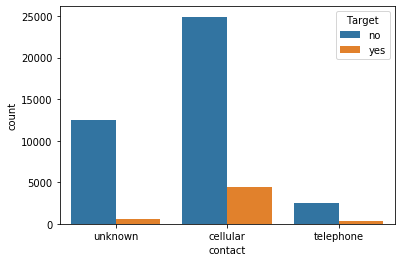

In [40]:
sns.countplot(bank['contact'], hue=bank['Target'])

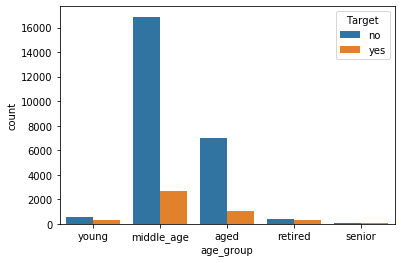

In [41]:
sns.countplot(bank['age_group'][bank['contact']=='cellular'], hue=bank['Target'][bank['contact']=='cellular'])

Middel Age people contacted through cellular are opting mostly for Term deposit

In [42]:
bank['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

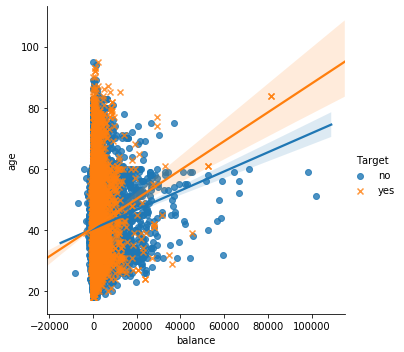

In [43]:
#plt.figure(figsize= (18,18))
sns.lmplot(data=bank,x='balance', y='age', hue='Target', markers=["o", "x"],fit_reg=True)

In [44]:
bank['bal_bins']=pd.cut(bank['balance'], [-10000, 0, 10000, 20000, 40000, 1100000], labels=['negative bal', '>10000', '> 20000', '> 40000', '<40000']) 

In [45]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,age_group,bal_bins
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,aged,>10000
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,middle_age,>10000
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,middle_age,>10000
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,aged,>10000
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,middle_age,>10000


# countplot of variables with Target=yes

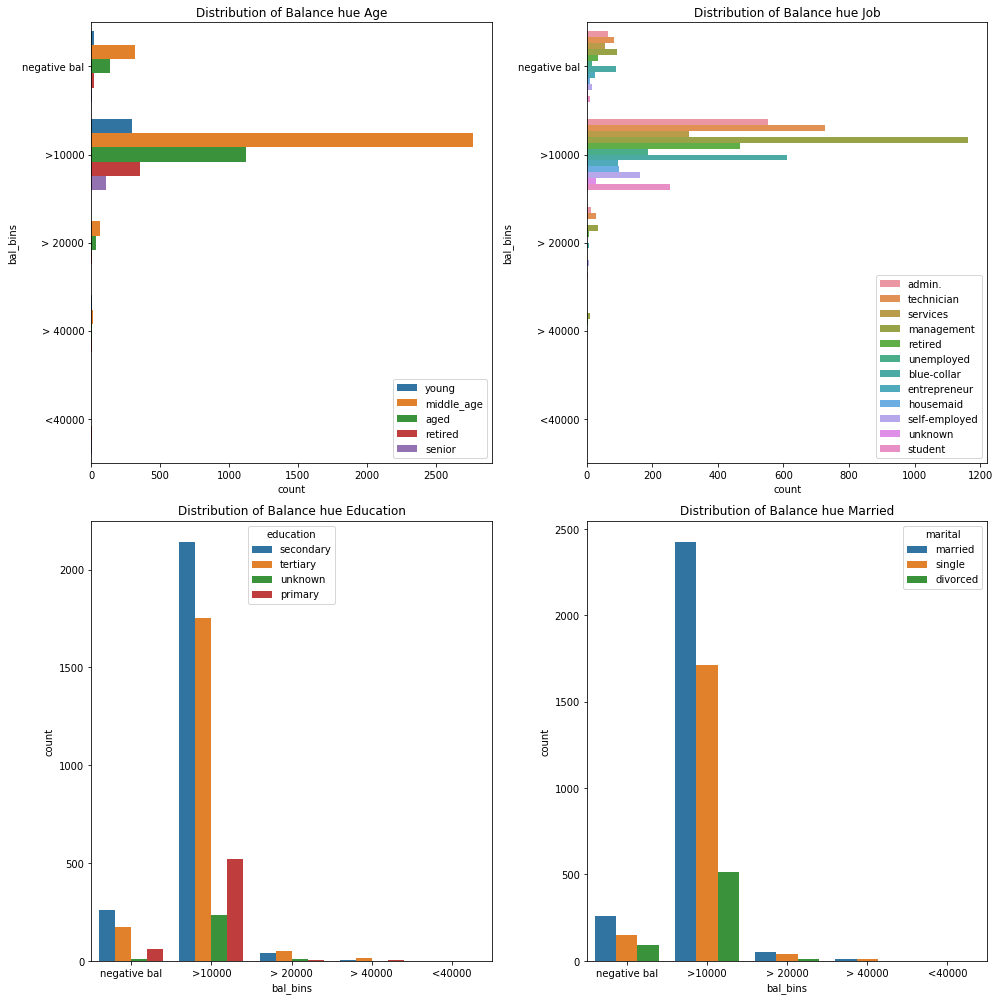

In [46]:
f6, axes7 =plt.subplots(2,2, figsize=(14,14))
axes7[0][0].set_title('Distribution of Balance hue Age')
sns.countplot(y=bank['bal_bins'][bank['Target']=='yes'], hue=bank['age_group'][bank['Target']=='yes'], ax=axes7[0][0])
axes7[0][0].legend(loc="lower right")
axes7[0][1].set_title('Distribution of Balance hue Job')
sns.countplot(y=bank['bal_bins'][bank['Target']=='yes'], hue=bank['job'][bank['Target']=='yes'], ax=axes7[0][1])
axes7[0][1].legend(loc="lower right")
axes7[1][0].set_title('Distribution of Balance hue Education')
sns.countplot(bank['bal_bins'][bank['Target']=='yes'], hue=bank['education'][bank['Target']=='yes'], ax=axes7[1][0])
axes7[1][1].set_title('Distribution of Balance hue Married')
sns.countplot(bank['bal_bins'][bank['Target']=='yes'], hue=bank['marital'][bank['Target']=='yes'], ax=axes7[1][1])
plt.tight_layout()


majority of the population who opted for Term Deposit have a bank balance within 10000. Very few people have opted for term insurance having balance above 10000. Also the data set seem to have major number of people having balance within 10000.

It is also indicated that usually middle-age people or management people with education level of secondary and tertiary with balance within 10000 are interested in taking Term Plan. 

Mosly married with Balance within 10000 were opting for Term Deposit.

In [47]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target,age_group,bal_bins
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,aged,>10000
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,middle_age,>10000
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,middle_age,>10000
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,aged,>10000
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,middle_age,>10000


# Analysis of Communication Parameters

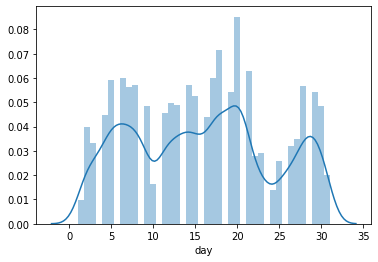

In [48]:
sns.distplot(bank['day'])

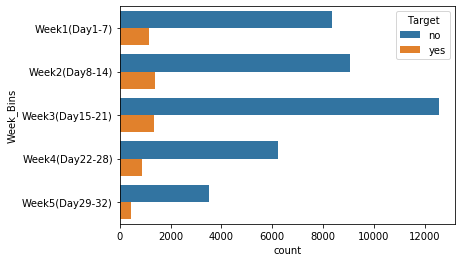

In [49]:
bank['Week_Bins']=pd.cut(bank['day'], [1,7,14,21,28,32], labels=['Week1(Day1-7)', 'Week2(Day8-14)', 'Week3(Day15-21)','Week4(Day22-28)', 'Week5(Day29-32)'])
sns.countplot(y=bank["Week_Bins"], hue=df["Target"])

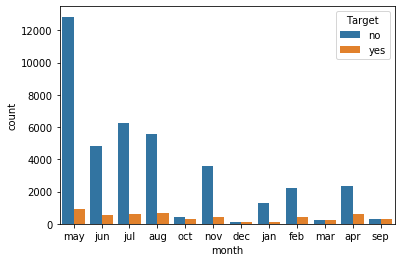

In [50]:
sns.countplot(bank['month'], hue=bank['Target'])

In [51]:
a=pd.crosstab([bank['month'], bank['Week_Bins']], bank['Target'], margins=True)
a.head()

Target                   no  yes   All
month Week_Bins                       
apr   Week1(Day1-7)     243   44   287
      Week2(Day8-14)    296   94   390
      Week3(Day15-21)  1493  177  1670
      Week4(Day22-28)   102   81   183
      Week5(Day29-32)   187  168   355

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

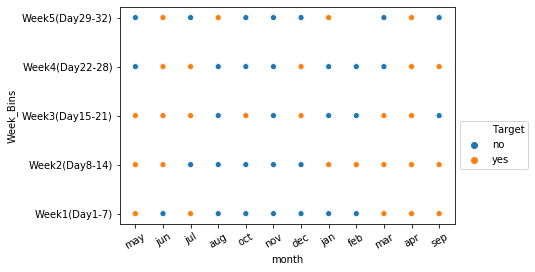

In [52]:
sns.scatterplot(x="month", y="Week_Bins", hue="Target", data=bank)
plt.legend(bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=30)

Highest number of term contact as well as deposit acceptance have happened in the month of April, May, June (Q2).

There is a positive corelation in the number of people contacted to the term deposit acceptance. 

Day of the month for communication has no impact on the overall outcome.

(array([3.557e+04, 5.286e+03, 2.026e+03, 8.670e+02, 4.670e+02, 2.880e+02,
        1.770e+02, 1.480e+02, 9.500e+01, 7.800e+01, 4.500e+01, 4.200e+01,
        2.300e+01, 3.200e+01, 2.000e+01, 2.000e+01, 8.000e+00, 5.000e+00,
        1.000e+00, 2.000e+00, 4.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1.        ,  3.06666667,  5.13333333,  7.2       ,  9.26666667,
        11.33333333, 13.4       , 15.46666667, 17.53333333, 19.6       ,
        21.66666667, 23.73333333, 25.8       , 27.86666667, 29.93333333,
        32.        , 34.06666667, 36.13333333, 38.2       , 40.26666667,
        42.33333333, 44.4       , 46.46666667, 48.53333333, 50.6       ,
        52.66666667, 54.73333333, 56.8       , 58.86666667, 60.93333333,
        63.        ]),
 <a list of 30 Patch objects>)

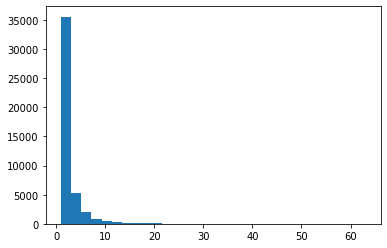

In [53]:
plt.hist(bank['campaign'], bins=30)

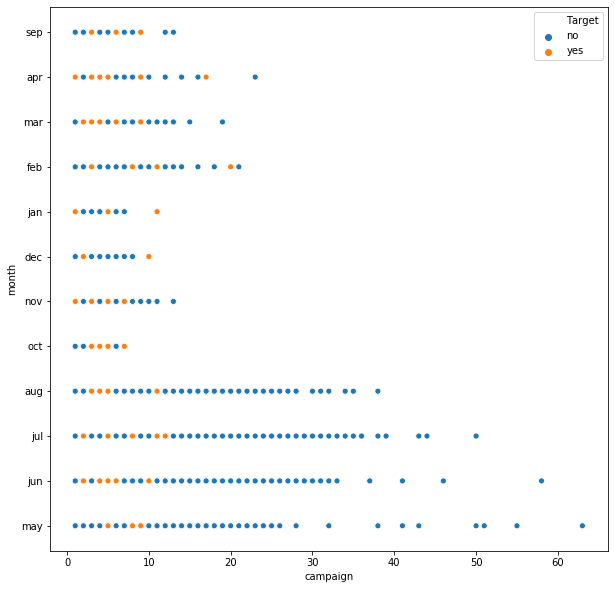

In [54]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="campaign", y="month", hue="Target", data=bank)

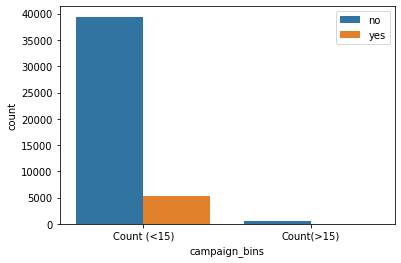

In [55]:
bank['campaign_bins']=pd.cut(bank["campaign"],[0,15,70],
                             labels=['Count (<15)', 'Count(>15)'])
sns.countplot(bank['campaign_bins'], hue=bank['Target'])
plt.legend(loc="upper right")

most of the campaign contact counts are <15

Campaign contacts across different months are mostly uniformly distributed

In [56]:
bank[bank['pdays']==999].Target.value_counts()

Series([], Name: Target, dtype: int64)

In [57]:
bank[bank['pdays']<0].Target.value_counts()

no     33570
yes     3384
Name: Target, dtype: int64

AS per data description 999 in pdays indicates that there is no communication. Hwoever we donot have any values with 999.
However, there are a lot of values with -1. Since number of days cannot be negative we will consider that to be indicative of no contact instead of 999.

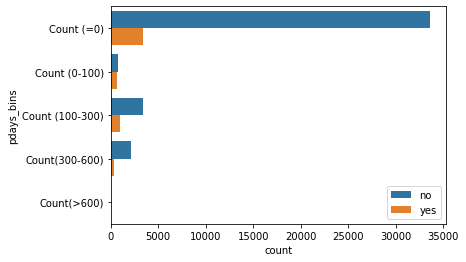

In [58]:
bank['pdays_bins']=pd.cut(bank["pdays"],[-2,0,100,300,600,900],
                             labels=['Count (=0)', 'Count (0-100)', 'Count (100-300)','Count(300-600)','Count(>600)'])
sns.countplot(y='pdays_bins', hue='Target', data =bank)
plt.legend(loc="lower right")

In [59]:
pd.crosstab(bank['pdays_bins'], bank['Target'])

Target,no,yes
pdays_bins,,
Count (=0),33570,3384
Count (0-100),815,622
Count (100-300),3409,941
Count(300-600),2095,323
Count(>600),33,19


People who are recontacted in less than 300 days seems to have higher changes of having Term deposit

In [60]:
bank['previous'].unique()

array([  0,   3,   1,   4,   2,  11,  16,   6,   5,  10,  12,   7,  18,
         9,  21,   8,  14,  15,  26,  37,  13,  25,  20,  27,  17,  23,
        38,  29,  24,  51, 275,  22,  19,  30,  58,  28,  32,  40,  55,
        35,  41], dtype=int64)

(array([4.4147e+04, 7.7000e+02, 1.9900e+02, 4.4000e+01, 3.0000e+01,
        1.0000e+01, 5.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  0. ,   5.5,  11. ,  16.5,  22. ,  27.5,  33. ,  38.5,  44. ,
         49.5,  55. ,  60.5,  66. ,  71.5,  77. ,  82.5,  88. ,  93.5,
         99. , 104.5, 110. , 115.5, 121. , 126.5, 132. , 137.5, 143. ,
        148.5, 154. , 159.5, 165. , 170.5, 176. , 181.5, 187. , 192.5,
        198. , 203.5, 209. , 214.5

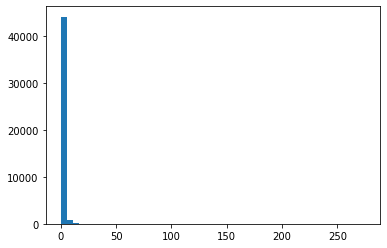

In [61]:
plt.hist(bank['previous'], bins=50)

In [62]:
bank[bank['previous']==0].Target.value_counts()

no     33570
yes     3384
Name: Target, dtype: int64

In [63]:
bank['prev_b']=pd.cut(bank['previous'], [-2,0,300],
                             labels=['Count (=0)', 'Counted_earlier' ])

pd.crosstab(bank['prev_b'], columns=bank['Target'], margins=True)

Target,no,yes,All
prev_b,,,
Count (=0),33570,3384,36954
Counted_earlier,6352,1905,8257
All,39922,5289,45211


From the data set it can be observed that 75% of the people in the data set (45211) are first time contacts.

Conversion rate of first time contacts as per the data set is only 9% (3384/(3384+33570))

conversion rate of people who have been contacted earlier is around 23% (1905/(1905+6352))

Therefore, recontacting prospects yield better result in term deposit acceptance or renewal.


In [64]:
bank['prev_bins']=pd.cut(bank['previous'], [-1,0,10,300],
                             labels=['First_timers', 'Contacted (0-10)', 'Contacted (>10)' ])

pd.crosstab(bank['prev_bins'], columns=bank['Target'], margins=True)

Target,no,yes,All
prev_bins,,,
First_timers,33570,3384,36954
Contacted (0-10),6112,1851,7963
Contacted (>10),240,54,294
All,39922,5289,45211


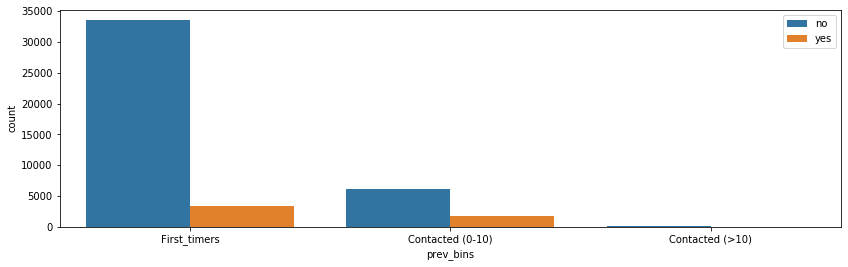

In [65]:
plt.figure(figsize=(14,4))
sns.countplot(bank['prev_bins'], hue=bank['Target'])
plt.legend(loc="upper right")

For Counts of Previous contacts > 0 (i.e recontacting people) it is observed that highest convertions happen if contacted (0-10) times and the conversion decreases if the number of communication increases over 10 times.

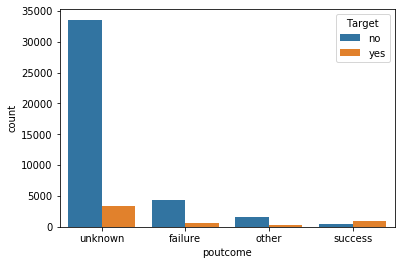

In [66]:
sns.countplot(bank['poutcome'], hue=bank['Target'])

In [67]:
pd.crosstab([bank['poutcome'],bank['prev_b']], bank['Target'], margins=True)

Target                       no   yes    All
poutcome prev_b                             
failure  Counted_earlier   4283   618   4901
other    Counted_earlier   1533   307   1840
success  Counted_earlier    533   978   1511
unknown  Count (=0)       33570  3384  36954
         Counted_earlier      3     2      5
All                       39922  5289  45211

Poutcome:

A major portion of the data set have Poutcome as unknown and were never contacted (count(=0)). 

However we see there are 5 records (2 Yes and 3 No for Term deposit) that are unknown but have been contacted during previous campaign. So, poutcome for these 5 records where 2 customers who have taken term deposit will be updated to poutcome "success" and the customers who denied term deposit are updated to poutcome "failure".

poutcomes as "success" shows a very high acceptance of Term Deposit and implies existing customers are interested in renewing or buying term deposits.

We can also merge "others" with "failure" since the acceptance rate of term deposit is low.

# Cleaning data for ML

In [68]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,previous,poutcome,Target,age_group,bal_bins,Week_Bins,campaign_bins,pdays_bins,prev_b,prev_bins
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,unknown,no,aged,>10000,Week1(Day1-7),Count (<15),Count (=0),Count (=0),First_timers
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,unknown,no,middle_age,>10000,Week1(Day1-7),Count (<15),Count (=0),Count (=0),First_timers
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,unknown,no,middle_age,>10000,Week1(Day1-7),Count (<15),Count (=0),Count (=0),First_timers
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,unknown,no,aged,>10000,Week1(Day1-7),Count (<15),Count (=0),Count (=0),First_timers
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,unknown,no,middle_age,>10000,Week1(Day1-7),Count (<15),Count (=0),Count (=0),First_timers


# Actions on Data
1) from Job analysis we can remove customers with unknown job profile as they are not opting for Term policy and are less in number

2) from balance analysis we conclude that people who have balance around 10000/- are taking Term policy but those with negative balance can be dropped

3) We can merge tertiary and secondary education category into a single category of higher education and merge Primary and unknown education category into a single one.

4) First time contacts seem to have higher result. We will classify it into 3 categories First timer, contacted (0-10), contacted (>10)


5) for +ve we will create another class having pdays > 300 based on above analysis. So the classes will be negative,0-300,300   and above.

In [69]:
clean_data= pd.DataFrame(bank, columns=bank.columns,copy=True)

In [70]:
clean_data

,age,job,marital,education,default,balance,housing,loan,contact,day,...,previous,poutcome,Target,age_group,bal_bins,Week_Bins,campaign_bins,pdays_bins,prev_b,prev_bins
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,unknown,no,aged,>10000,Week1(Day1-7),Count (<15),Count (=0),Count (=0),First_timers
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,unknown,no,middle_age,>10000,Week1(Day1-7),Count (<15),Count (=0),Count (=0),First_timers
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,unknown,no,middle_age,>10000,Week1(Day1-7),Count (<15),Count (=0),Count (=0),First_timers
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,unknown,no,aged,>10000,Week1(Day1-7),Count (<15),Count (=0),Count (=0),First_timers
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,unknown,no,middle_age,>10000,Week1(Day1-7),Count (<15),Count (=0),Count (=0),First_timers
5,35,management,married,tertiary,no,231,yes,no,unknown,5,...,0,unknown,no,middle_age,>10000,Week1(Day1-7),Count (<15),Count (=0),Count (=0),First_timers
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,...,0,unknown,no,middle_age,>10000,Week1(Day1-7),Count (<15),Count (=0),Count (=0),First_timers
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,...,0,unknown,no,middle_age,>10000,Week1(Day1-7),Count (<15),Count (=0),Count (=0),First_timers
8,58,retired,married,primary,no,121,yes,no,unknown,5,...,0,unknown,no,aged,>10000,Week1(Day1-7),Count (<15),Count (=0),Count (=0),First_timers
9,43,technician,single,secondary,no,593,yes,no,unknown,5,...,0,unknown,no,middle_age,>10000,Week1(Day1-7),Count (<15),Count (=0),Count (=0),First_timers


In [71]:
clean_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target', 'age_group', 'bal_bins', 'Week_Bins',
       'campaign_bins', 'pdays_bins', 'prev_b', 'prev_bins'],
      dtype='object')

In [72]:
clean_data['pdays_bins']=pd.cut(clean_data["pdays"],[-2,0,300,900],labels=['not_contacted','pos_response','neg_response'])


In [73]:
clean_data.drop([ 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous','Week_Bins','prev_b', 'age_group', 'contact'], axis=1, inplace=True)

In [74]:
#clean_data[clean_data['job']=='unknown'].replace(value='np.NaN')
clean_data['job'].replace('unknown',np.NaN,inplace=True)

In [75]:
clean_data.dropna(inplace=True)

In [76]:
clean_data.head()

,age,job,marital,education,default,balance,housing,loan,poutcome,Target,bal_bins,campaign_bins,pdays_bins,prev_bins
0,58,management,married,tertiary,no,2143,yes,no,unknown,no,>10000,Count (<15),not_contacted,First_timers
1,44,technician,single,secondary,no,29,yes,no,unknown,no,>10000,Count (<15),not_contacted,First_timers
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,no,>10000,Count (<15),not_contacted,First_timers
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,no,>10000,Count (<15),not_contacted,First_timers
5,35,management,married,tertiary,no,231,yes,no,unknown,no,>10000,Count (<15),not_contacted,First_timers


In [77]:
clean_data.drop(clean_data.loc[clean_data['balance']<=0].index, inplace=True)

In [78]:
clean_data['education']= clean_data['education'].replace({'primary':'basic_edu', 'unknown':'basic_edu','secondary':'higher_edu', 'tertiary':'higher_edu'})

In [79]:
clean_data.head()

,age,job,marital,education,default,balance,housing,loan,poutcome,Target,bal_bins,campaign_bins,pdays_bins,prev_bins
0,58,management,married,higher_edu,no,2143,yes,no,unknown,no,>10000,Count (<15),not_contacted,First_timers
1,44,technician,single,higher_edu,no,29,yes,no,unknown,no,>10000,Count (<15),not_contacted,First_timers
2,33,entrepreneur,married,higher_edu,no,2,yes,yes,unknown,no,>10000,Count (<15),not_contacted,First_timers
3,47,blue-collar,married,basic_edu,no,1506,yes,no,unknown,no,>10000,Count (<15),not_contacted,First_timers
5,35,management,married,higher_edu,no,231,yes,no,unknown,no,>10000,Count (<15),not_contacted,First_timers


In [80]:
clean_data['poutcome'].replace('other','failure',inplace=True)

In [81]:
clean_data.head()

,age,job,marital,education,default,balance,housing,loan,poutcome,Target,bal_bins,campaign_bins,pdays_bins,prev_bins
0,58,management,married,higher_edu,no,2143,yes,no,unknown,no,>10000,Count (<15),not_contacted,First_timers
1,44,technician,single,higher_edu,no,29,yes,no,unknown,no,>10000,Count (<15),not_contacted,First_timers
2,33,entrepreneur,married,higher_edu,no,2,yes,yes,unknown,no,>10000,Count (<15),not_contacted,First_timers
3,47,blue-collar,married,basic_edu,no,1506,yes,no,unknown,no,>10000,Count (<15),not_contacted,First_timers
5,35,management,married,higher_edu,no,231,yes,no,unknown,no,>10000,Count (<15),not_contacted,First_timers


In [82]:
clean_data.shape

(37675, 14)

In [83]:
clean_data.drop('bal_bins', axis=1, inplace=True)
clean_data['poutcome'].replace('unknown','nonexistance',inplace=True)
clean_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'poutcome', 'Target', 'campaign_bins', 'pdays_bins',
       'prev_bins'],
      dtype='object')

In [84]:
columns=['job', 'marital', 'education', 'default', 'housing','loan', 'poutcome','pdays_bins', 'prev_bins', 'campaign_bins']

In [85]:
final_data=pd.get_dummies(clean_data, columns=columns, drop_first=True)

In [86]:
final_data.shape

(37675, 26)

In [87]:
final_data.describe()

,age,balance,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,default_yes,housing_yes,loan_yes,poutcome_nonexistance,poutcome_success,pdays_bins_pos_response,pdays_bins_neg_response,prev_bins_Contacted (0-10),prev_bins_Contacted (>10),campaign_bins_Count(>15)
count,37675.000000,37675.000000,37675.000000,37675.000000,37675.000000,37675.000000,37675.000000,37675.000000,37675.000000,37675.000000,...,37675.000000,37675.000000,37675.000000,37675.000000,37675.000000,37675.000000,37675.000000,37675.000000,37675.000000,37675.000000
mean,40.938155,1652.946118,0.212502,0.032382,0.027843,0.213749,0.052475,0.036284,0.089051,0.023358,...,0.006848,0.549754,0.145242,0.806662,0.037691,0.137810,0.055660,0.186622,0.006848,0.010378
std,10.747294,3241.118285,0.409083,0.177015,0.164526,0.409957,0.222986,0.186998,0.284821,0.151039,...,0.082470,0.497525,0.352350,0.394921,0.190450,0.344705,0.229267,0.389613,0.082470,0.101345
min,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,226.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,643.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,1769.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,95.000000,102127.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [88]:
final_data['Target'].replace({'yes':1,'no':0}, inplace=True)
final_data.head()

,age,balance,Target,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,default_yes,housing_yes,loan_yes,poutcome_nonexistance,poutcome_success,pdays_bins_pos_response,pdays_bins_neg_response,prev_bins_Contacted (0-10),prev_bins_Contacted (>10),campaign_bins_Count(>15)
0,58,2143,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,44,29,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,33,2,0,0,1,0,0,0,0,0,...,0,1,1,1,0,0,0,0,0,0
3,47,1506,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
5,35,231,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [89]:
final_data.dtypes

age                           int64
balance                       int64
Target                        int64
job_blue-collar               uint8
job_entrepreneur              uint8
job_housemaid                 uint8
job_management                uint8
job_retired                   uint8
job_self-employed             uint8
job_services                  uint8
job_student                   uint8
job_technician                uint8
job_unemployed                uint8
marital_married               uint8
marital_single                uint8
education_higher_edu          uint8
default_yes                   uint8
housing_yes                   uint8
loan_yes                      uint8
poutcome_nonexistance         uint8
poutcome_success              uint8
pdays_bins_pos_response       uint8
pdays_bins_neg_response       uint8
prev_bins_Contacted (0-10)    uint8
prev_bins_Contacted (>10)     uint8
campaign_bins_Count(>15)      uint8
dtype: object

# Machine Learning 

In [90]:
X=final_data.drop('Target', axis=1)
y=final_data['Target']


In [91]:
from sklearn.model_selection import train_test_split
#X_train, X_train, y_test, y_test = train_test_split(X, y, test_size=0.30, random_state=10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

# Logistic Regression

In [93]:
lr= LogisticRegression(solver='liblinear')
lr.fit(X_train,y_train)
lr_predict=lr.predict(X_test)
lr_score=lr.score(X_test, y_test)
print(lr_score)
new=lr.coef_.reshape(25,1)
cdf=pd.DataFrame(new, index=X.columns, columns=['coeff'])
cdf

0.8823292849674254


,coeff
age,-0.005591
balance,0.000017
job_blue-collar,-0.401017
job_entrepreneur,-0.260281
job_housemaid,-0.242918
job_management,0.000110
job_retired,0.626408
job_self-employed,-0.046459
job_services,-0.232555
job_student,0.257647


[[  259  1337]
 [  126 10711]]


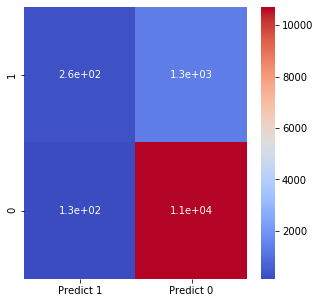

In [94]:
cm=metrics.confusion_matrix(y_test, lr_predict, labels=(1,0))
print(cm)
df_cm=pd.DataFrame(cm, index=['1','0'], columns=['Predict 1', 'Predict 0'])
plt.figure(figsize=(5,5))
sns.heatmap(df_cm, annot=True, cmap='coolwarm')

In [95]:
print(metrics.classification_report(y_test,lr_predict))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     10837
           1       0.67      0.16      0.26      1596

    accuracy                           0.88     12433
   macro avg       0.78      0.58      0.60     12433
weighted avg       0.86      0.88      0.85     12433



In [96]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
s=scalar.fit_transform(X_train)

In [97]:
scale_train= pd.DataFrame(s, columns=X_train.columns)

# K Near Neighbour

In [98]:
error_rate=[]
for i in range (1,40):
        knn=KNeighborsClassifier(n_neighbors=i)
        knn.fit(scale_train, y_train)
        knn_predict=knn.predict(X_test)
        error_rate.append(np.mean(knn_predict != y_test))
        


Text(0, 0.5, 'Error Rate')

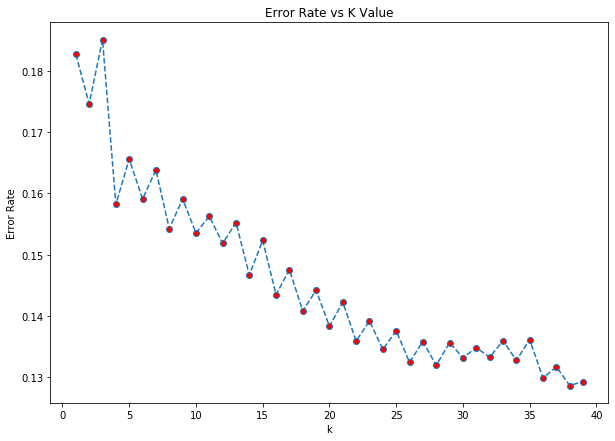

In [99]:
plt.figure(figsize=(10,7))
plt.plot(range(1,40), error_rate, linestyle='dashed', marker='o', markerfacecolor='red')
plt.title('Error Rate vs K Value')
plt.xlabel('k')
plt.ylabel('Error Rate')

In [100]:
KNN39=KNeighborsClassifier(n_neighbors=39)
KNN39.fit(scale_train, y_train)
KNN39_predict=KNN39.predict(X_test)
KNN39_score=KNN39.score(X_test,y_test)
KNN39_score

0.8706667739081476

In [101]:
print(confusion_matrix(KNN39_predict, y_test))
print(classification_report(KNN39_predict, y_test))

[[10817  1588]
 [   20     8]]
              precision    recall  f1-score   support

           0       1.00      0.87      0.93     12405
           1       0.01      0.29      0.01        28

    accuracy                           0.87     12433
   macro avg       0.50      0.58      0.47     12433
weighted avg       1.00      0.87      0.93     12433



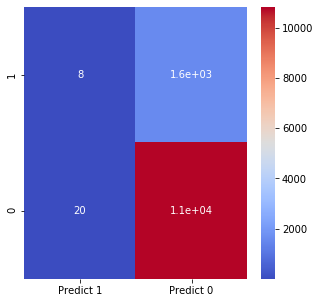

In [102]:
cm1=metrics.confusion_matrix(y_test, KNN39_predict, labels=(1,0))
df_cm1=pd.DataFrame(cm1, index=["1","0"], columns=["Predict 1", "Predict 0"])
plt.figure(figsize=(5,5))
sns.heatmap(df_cm1, annot=True, cmap='coolwarm')

# SVM (using GridSearchCV)

In [103]:
from sklearn.model_selection import GridSearchCV
param_grid= {'C':[0.1,1,10,100], 'gamma':[1,0.1,0.001,0.0001]}
grid=GridSearchCV(SVC(),param_grid,verbose=2)
grid.fit(X_train,y_train)
sv_predict=grid.predict(X_test)
sv_score=grid.score(X_test,y_test)
sv_score

C:\Users\panka\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total= 1.3min
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s


[CV] ................................... C=0.1, gamma=1, total= 1.3min
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total= 1.4min
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=  49.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=  48.1s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=  50.2s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=  12.6s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ............................... C=0.1, gamma=0.001, total=  13.7s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 83.9min finished


0.8747687605565833

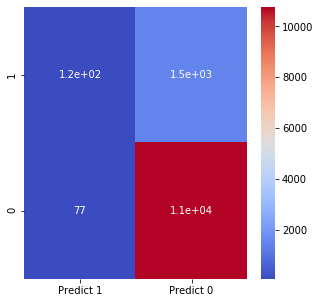

In [119]:
cm2=metrics.confusion_matrix(y_test, sv_predict, labels=(1,0))
df_cm2=pd.DataFrame(cm2, index=["1","0"], columns=["Predict 1", "Predict 0"])
plt.figure(figsize=(5,5))
sns.heatmap(df_cm2, annot=True, cmap='coolwarm')

In [105]:
print(confusion_matrix(sv_predict, y_test, labels=(1,0)))
print(classification_report(sv_predict, y_test))

[[  116    77]
 [ 1480 10760]]
              precision    recall  f1-score   support

           0       0.99      0.88      0.93     12240
           1       0.07      0.60      0.13       193

    accuracy                           0.87     12433
   macro avg       0.53      0.74      0.53     12433
weighted avg       0.98      0.87      0.92     12433



# Ensemble (Random Forest, AdaBoost, Gradient Boost, XGboost)

In [106]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
rfc_predict=rfc.predict(X_test)
rfc_score=rfc.score(X_test, y_test)
rfc_score

0.8643127161586102

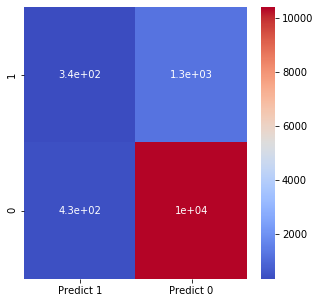

In [107]:
cm3=metrics.confusion_matrix(y_test, rfc_predict, labels=(1,0))
df_cm3=pd.DataFrame(cm3, index=["1","0"], columns=["Predict 1", "Predict 0"])
plt.figure(figsize=(5,5))
sns.heatmap(df_cm3, annot=True, cmap='coolwarm')

In [108]:
print(confusion_matrix(rfc_predict, y_test, labels=(1,0)))
print(classification_report(rfc_predict, y_test))

[[  338   429]
 [ 1258 10408]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.93     11666
           1       0.21      0.44      0.29       767

    accuracy                           0.86     12433
   macro avg       0.59      0.67      0.61     12433
weighted avg       0.91      0.86      0.89     12433



In [109]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
abc.fit(X_train,y_train)
abc_predict=abc.predict(X_test)
abc_score=abc.score(X_test, y_test)
abc_score

0.8829727338534545

[[  269   128]
 [ 1327 10709]]
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     12036
           1       0.17      0.68      0.27       397

    accuracy                           0.88     12433
   macro avg       0.58      0.78      0.60     12433
weighted avg       0.96      0.88      0.92     12433



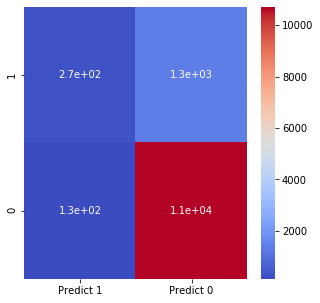

In [110]:
cm4=metrics.confusion_matrix(y_test, abc_predict, labels=(1,0))
df_cm4=pd.DataFrame(cm4, index=["1","0"], columns=["Predict 1", "Predict 0"])
plt.figure(figsize=(5,5))
sns.heatmap(df_cm4, annot=True, cmap='coolwarm')
print(confusion_matrix(abc_predict, y_test, labels=(1,0)))
print(classification_report(abc_predict, y_test))

In [111]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)
gbc_predict=gbc.predict(X_test)
gbc_score=gbc.score(X_test, y_test)
gbc_score

0.8828923027427009

[[  271   131]
 [ 1325 10706]]
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     12031
           1       0.17      0.67      0.27       402

    accuracy                           0.88     12433
   macro avg       0.58      0.78      0.60     12433
weighted avg       0.96      0.88      0.91     12433



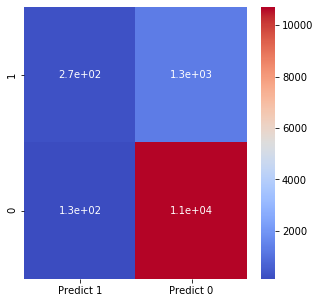

In [112]:
cm5=metrics.confusion_matrix(y_test, gbc_predict, labels=(1,0))
df_cm5=pd.DataFrame(cm5, index=["1","0"], columns=["Predict 1", "Predict 0"])
plt.figure(figsize=(5,5))
sns.heatmap(df_cm5, annot=True, cmap='coolwarm')
print(confusion_matrix(gbc_predict, y_test, labels=(1,0)))
print(classification_report(gbc_predict, y_test))

In [113]:
from xgboost import XGBRegressor, XGBClassifier

In [114]:
xgb=XGBClassifier()

In [115]:
xgb.fit(X_train, y_train)
xgb_predict=xgb.predict(X_test)
xgb_score=xgb.score(X_test, y_test)

In [116]:
xgb_score

0.8831335960749618

[[  265   122]
 [ 1331 10715]]
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     12046
           1       0.17      0.68      0.27       387

    accuracy                           0.88     12433
   macro avg       0.58      0.79      0.60     12433
weighted avg       0.96      0.88      0.92     12433



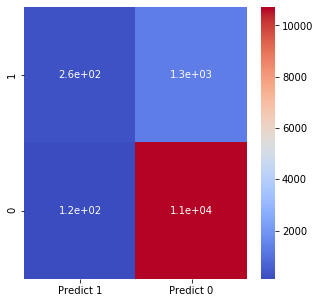

In [117]:
cm6=metrics.confusion_matrix(y_test, xgb_predict, labels=(1,0))
df_cm6=pd.DataFrame(cm6, index=["1","0"], columns=["Predict 1", "Predict 0"])
plt.figure(figsize=(5,5))
sns.heatmap(df_cm6, annot=True, cmap='coolwarm')
print(confusion_matrix(xgb_predict, y_test, labels=(1,0)))
print(classification_report(xgb_predict, y_test))

# Conclusion

In [123]:
conclusion=pd.DataFrame({'Machine Models': ['Logistic Reg', 'KNN', 'SVM','Random Forest','AdaBoost', 'Gradient Boost', 'XGboost'],'Scores':[lr_score, KNN39_score,sv_score,rfc_score,abc_score,gbc_score,xgb_score]})

In [125]:
conclusion

,Machine Models,Scores
0,Logistic Reg,0.882329
1,KNN,0.870667
2,SVM,0.874769
3,Random Forest,0.864313
4,AdaBoost,0.882973
5,Gradient Boost,0.882892
6,XGboost,0.883134


# From above we conclude that Logistic Regression and XGboost are best to implement in the model.